<a href="https://colab.research.google.com/github/Capou/FishClassifier/blob/master/fish_classifier_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [ ]:
import pandas as pd


fish = {'Familie': ['Leuciscidae', 'Icaluridae', 'Cobitidae', 'Cyprinidae', 'Esocidae', 'Percidae', 'Salmonidae'],
        'Spezies': ['abramis_brama', 'ameiurus_nebulosus', 'cobitis_taenia', 'cyprinus_carpio', 'esox_lucius', 'gymnocephalus_cernua', 'salmo_trutta'],
        'Name': ['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle'],
        'Koerperform':['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle'],
        'Mund': ['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle'],
        'Farbe': ['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle'], 
        'Rueckenflosse': ['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle'], 
        'Bauchflosse':['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle'], 
        'Schwanzflosse': ['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle'],
        'Schuppen': ['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle'],
        'Schonzeit': ['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle'],
        'Schonmaß': ['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle']
        }


cars = {'Brand': ['Honda Civic','Toyota Corolla','Ford Focus','Audi A4'],
        'Price': [22000,25000,27000,35000]
        }

df = pd.DataFrame(fish, columns = ['Familie', 'Spezies', 'Name', 'Koerperform', 'Mund', 'Farbe', 'Rueckenflosse', 'Bauchflosse','Schwanzflosse', 'Schuppen', 'Schonzeit','Schonmaß'], index=['abramis_brama', 'ameiurus_nebulosus', 'cobitis_taenia', 'cyprinus_carpio', 'esox_lucius', 'gymnocephalus_cernua', 'salmo_trutta'])

print (df)
df.loc['abramis_brama']


                          Familie               Spezies         Name  \
abramis_brama         Leuciscidae         abramis_brama       Brasse   
ameiurus_nebulosus     Icaluridae    ameiurus_nebulosus   Katzenwels   
cobitis_taenia          Cobitidae        cobitis_taenia  Dorngrundel   
cyprinus_carpio        Cyprinidae       cyprinus_carpio      Karpfen   
esox_lucius              Esocidae           esox_lucius        Hecht   
gymnocephalus_cernua     Percidae  gymnocephalus_cernua   Kaulbarsch   
salmo_trutta           Salmonidae          salmo_trutta      Forelle   

                      Koerperform         Mund        Farbe Rueckenflosse  \
abramis_brama              Brasse       Brasse       Brasse        Brasse   
ameiurus_nebulosus     Katzenwels   Katzenwels   Katzenwels    Katzenwels   
cobitis_taenia        Dorngrundel  Dorngrundel  Dorngrundel   Dorngrundel   
cyprinus_carpio           Karpfen      Karpfen      Karpfen       Karpfen   
esox_lucius                 Hecht     

Familie            Leuciscidae
Spezies          abramis_brama
Name                    Brasse
Koerperform             Brasse
Mund                    Brasse
Farbe                   Brasse
Rueckenflosse           Brasse
Bauchflosse             Brasse
Schwanzflosse           Brasse
Schuppen                Brasse
Schonzeit               Brasse
Schonmaß                Brasse
Name: abramis_brama, dtype: object

In [ ]:
learn_inf = load_learner('/content/gdrive/MyDrive/pkl/export-059.pkl')

When we're doing inference, we're generally just getting predictions for one image at a time. To do this, pass a filename to `predict`:

In [ ]:
learn_inf.predict('/content/gdrive/MyDrive/Seminar/hecht.png')

('esox_lucius',
 tensor(4),
 tensor([6.4421e-04, 6.7179e-06, 5.2202e-06, 1.3806e-02, 9.8553e-01, 3.5615e-07, 4.2526e-06]))

This has returned three things: the predicted category in the same format you originally provided (in this case that's a string), the index of the predicted category, and the probabilities of each category. The last two are based on the order of categories in the *vocab* of the `DataLoaders`; that is, the stored list of all possible categories. At inference time, you can access the `DataLoaders` as an attribute of the `Learner`:

In [ ]:
learn_inf.dls.vocab

['abramis_brama', 'ameiurus_nebulosus', 'cobitis_taenia', 'cyprinus_carpio', 'esox_lucius', 'gymnocephalus_cernua', 'salmo_trutta']

In [ ]:
def create_df(): 
    fish = {'Familie': ['Leuciscidae', 'Icaluridae', 'Cobitidae', 'Cyprinidae', 'Esocidae', 'Percidae', 'Salmonidae'],
        'Spezies': ['abramis_brama', 'ameiurus_nebulosus', 'cobitis_taenia', 'cyprinus_carpio', 'esox_lucius', 'gymnocephalus_cernua', 'salmo_trutta'],
        'Name': ['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle'],
        'Koerperform':['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle'],
        'Mund': ['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle'],
        'Farbe': ['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle'], 
        'Rueckenflosse': ['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle'], 
        'Bauchflosse':['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle'], 
        'Schwanzflosse': ['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle'],
        'Schuppen': ['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle'],
        'Schonzeit': ['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle'],
        'Schonmaß': ['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle']
        }
    df = pd.DataFrame(fish, columns = ['Familie', 'Spezies', 'Name', 'Koerperform', 'Mund', 'Farbe', 'Rueckenflosse', 'Bauchflosse','Schwanzflosse', 'Schuppen', 'Schonzeit','Schonmaß'], index=['abramis_brama', 'ameiurus_nebulosus', 'cobitis_taenia', 'cyprinus_carpio', 'esox_lucius', 'gymnocephalus_cernua', 'salmo_trutta'])
    return df 

### Creating a Notebook App from the Model

To use our model in an application, we can simply treat the `predict` method as a regular function. Therefore, creating an app from the model can be done using any of the myriad of frameworks and techniques available to application developers.

However, most data scientists are not familiar with the world of web application development. So let's try using something that you do, at this point, know: it turns out that we can create a complete working web application using nothing but Jupyter notebooks! The two things we need to make this happen are:

- IPython widgets (ipywidgets)
- Voilà

*IPython widgets* are GUI components that bring together JavaScript and Python functionality in a web browser, and can be created and used within a Jupyter notebook. For instance, the image cleaner that we saw earlier in this chapter is entirely written with IPython widgets. However, we don't want to require users of our application to run Jupyter themselves.

That is why *Voilà* exists. It is a system for making applications consisting of IPython widgets available to end users, without them having to use Jupyter at all. Voilà is taking advantage of the fact that a notebook _already is_ a kind of web application, just a rather complex one that depends on another web application: Jupyter itself. Essentially, it helps us automatically convert the complex web application we've already implicitly made (the notebook) into a simpler, easier-to-deploy web application, which functions like a normal web application rather than like a notebook.

But we still have the advantage of developing in a notebook, so with ipywidgets, we can build up our GUI step by step. We will use this approach to create a simple image classifier. First, we need a file upload widget:

In [ ]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

<img alt="An upload button" width="159" src="https://github.com/Capou/FishClassifier/blob/master/images/att_00008.png?raw=1">

Now we can grab the image:

In [ ]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['/content/gdrive/MyDrive/Seminar/hecht.png'])

In [ ]:
img = PILImage.create(btn_upload.data[-1])

<img alt="Output widget representing the image" width="117" src="https://github.com/Capou/FishClassifier/blob/master/images/att_00009.png?raw=1">

We can use an `Output` widget to display it:

In [ ]:
df=create_df()

In [ ]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
#hide_output
out_pl_df = widgets.Output()
out_pl_df.clear_output()
with out_pl_df: display(df.loc['abramis_brama'])
out_pl_df

Output()

<img alt="Output widget representing the image" width="117" src="https://github.com/Capou/FishClassifier/blob/master/images/att_00009.png?raw=1">

Then we can get our predictions:

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
f'{pred}'

'esox_lucius'

and use a `Label` to display them:

In [ ]:
out_pl_df = widgets.Output()
out_pl_df.clear_output()
with out_pl_df: display(df.loc[f'{pred}'])
out_pl_df

Output()

In [ ]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: esox_lucius; Probability: 0.9855')

In [ ]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

We'll also need a *click event handler*; that is, a function that will be called when it's pressed. We can just copy over the lines of code from above:

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    df = create_df()
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    out_pl_df.clear_output()
    with out_pl_df: display(df.loc[f'{pred}'])
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
def create_df(): 
    fish = {'Familie': ['Leuciscidae', 'Icaluridae', 'Cobitidae', 'Cyprinidae', 'Esocidae', 'Percidae', 'Salmonidae'],
        'Spezies': ['abramis_brama', 'ameiurus_nebulosus', 'cobitis_taenia', 'cyprinus_carpio', 'esox_lucius', 'gymnocephalus_cernua', 'salmo_trutta'],
        'Name': ['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle'],
        'Koerperform':['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle'],
        'Mund': ['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle'],
        'Farbe': ['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle'], 
        'Rueckenflosse': ['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle'], 
        'Bauchflosse':['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle'], 
        'Schwanzflosse': ['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle'],
        'Schuppen': ['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle'],
        'Schonzeit': ['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle'],
        'Schonmaß': ['Brasse', 'Katzenwels', 'Dorngrundel', 'Karpfen', 'Hecht', 'Kaulbarsch', 'Forelle']
        }
    df = pd.DataFrame(fish, columns = ['Familie', 'Spezies', 'Name', 'Koerperform', 'Mund', 'Farbe', 'Rueckenflosse', 'Bauchflosse','Schwanzflosse', 'Schuppen', 'Schonzeit','Schonmaß'], index=['abramis_brama', 'ameiurus_nebulosus', 'cobitis_taenia', 'cyprinus_carpio', 'esox_lucius', 'gymnocephalus_cernua', 'salmo_trutta'])
    return df 

You can test the button now by pressing it, and you should see the image and predictions update automatically!

We can now put them all in a vertical box (`VBox`) to complete our GUI:

In [ ]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [ ]:
#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

<img alt="The whole widget" width="233" src="https://github.com/Capou/FishClassifier/blob/master/images/att_00011.png?raw=1">

In [ ]:
VBox([Widgets.Label('Informationen'), 
      out_pl_df])

NameError: ignored

In [ ]:
HBox([
    VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred]), 
    VBox([widgets.Label('Informationen'), 
      out_pl_df])])

IndexError: ignored

We have written all the code necessary for our app. The next step is to convert it into something we can deploy.

### Turning Your Notebook into a Real App

In [ ]:
#hide
# !pip install voila
# !jupyter serverextension enable --sys-prefix voila 

# Fisch Identifizierung im Web


In [ ]:
#path = Path() 
#learn_inf = load_learner(path/'export.pkl', cpu=True)
#btn_upload = widget.FileUpload() 
#out_pl = widget.Output() 
#lbl_pred = widget.Label() 


FileNotFoundError: ignored

In [ ]:
def on_click(change): 
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output() 
  with out_pl: display(img.to_thumb(128,128))
  pred,pred_idx,probs = learn_inf.predict(img) 
  lbl_pred.value= f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [ ]:
#btn_upload.observe(on_click, names=['data'])

In [ ]:
#display(VBox([widget.Label('Select your fish!'), btn_upload, out_pl, lbl_pred]))

# Erstellen des EfficientNet Klassifizierers.

In [ ]:
!pip install fastai wwf timm -q --upgrade

In [ ]:
from fastai.vision.all import *
from fastai.vision.learner import _update_first_layer


In [ ]:
# Mit drive verbinden zum laden der Bilder
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

from wwf.utils import state_versions
state_versions(['fastai', 'fastcore', 'wwf', 'timm'])


---
This article is also a Jupyter Notebook available to be run from the top down. There
will be code snippets that you can then run in any environment.

Below are the versions of `fastai`, `fastcore`, `wwf`, and `timm` currently running at the time of writing this:
* `fastai` : 2.4 
* `fastcore` : 1.3.20 
* `wwf` : 0.0.16 
* `timm` : 0.4.9 
---

# Laden der Daten

In [ ]:
path = Path('/content/drive/MyDrive/Seminar/fish_1')

In [ ]:
# setzen der Parameter
batch_tfms = [*aug_transforms(size=224, flip_vert=True, min_scale=0.75, max_warp=0), 
              Normalize.from_stats(*imagenet_stats)]
#item_tfms = Resize(460, min_scale=0.75, ratio=(1.,1.))
bs=64

In [ ]:
Normalize??

In [ ]:
# DataLoaders mit Augmentationen erstellen
fish = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(460), 
    batch_tfms=batch_tfms)
dls = fish.dataloaders(path, bs=bs)

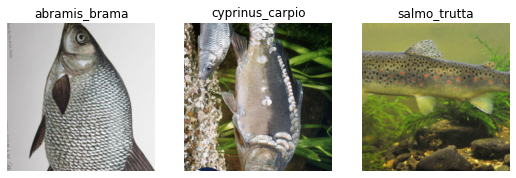

In [ ]:
# Test des DataLoaders
dls.show_batch(max_n=3)

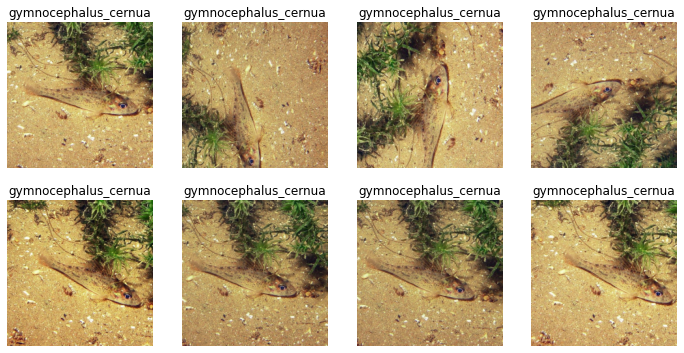

In [ ]:
# Test der Transformationen
dls.show_batch(nrows=2, ncols=4, unique=true)

# Modell Import
Für die Umsetzung wird Ross Wightman's [repository](https://github.com/rwightman/pytorch-image-models) verwendet. Dieses bietet bereits trainierte Modelle an und wir über folgenden Code installiert.

In [ ]:
!pip install timm

In [ ]:
from timm import create_model


In [ ]:
net = create_model('efficientnet_b3a', pretrained=True)

In [ ]:
# Vergleich der Struktur von FastAi
learn = cnn_learner(dls, resnet18)

In [ ]:

learn.model[-1]

Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): Flatten(full=False)
  (2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=1024, out_features=512, bias=False)
  (5): ReLU(inplace=True)
  (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=512, out_features=7, bias=False)
)

Anpassen des EfficientNet models an die FastAi Anforderungen.

In [ ]:
net

EfficientNet(
  (conv_stem): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): SiLU(inplace=True)
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
        (bn1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): SiLU(inplace=True)
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(10, 40, kernel_size=(1, 1), stride=(1, 1))
        )
        (conv_pw): Conv2d(40, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): Identity()
      )
      (1): DepthwiseS

In [ ]:
# 
# Quelle der Funktion gemäs Müller 2020: 
# Müller, Zachary (2020): A walk with fastai2. 05_EfficientNet_and_Custom_Weights. 
# Online verfügbar unter https://colab.research.google.com/github/walkwithfastai/
# walkwithfastai.github.io/blob/master/nbs/course2020/vision/05_EfficientNet_and
# _Custom_Weights.ipynb#scrollTo=LyZbSn3OcT0S, zuletzt geprüft am 19.06.2021.
def create_timm_body(arch:str, pretrained=True, cut=None, n_in=3):
    "Creates a body from any model in the `timm` library."
    model = create_model(arch, pretrained=pretrained, num_classes=0, global_pool='')
    _update_first_layer(model, n_in, pretrained)
    if cut is None:
        ll = list(enumerate(model.children()))
        cut = next(i for i,o in reversed(ll) if has_pool_type(o))
    if isinstance(cut, int): return nn.Sequential(*list(model.children())[:cut])
    elif callable(cut): return cut(model)
    else: raise NamedError("cut must be either integer or function")

In [ ]:
# Erstellen des EfficientNet Modells
# Extrahieren der Body Layer
body = create_timm_body('efficientnet_b3a', pretrained=True)
# extrahieren der Anzahl an Input Features
nf = num_features_model(nn.Sequential(*body.children()))
# erstellen des Heads mit entsprechender Anzahl input und output features
head = create_head(nf, dls.c)
# zusammenfügen 
model = nn.Sequential(body, head)
# initialisieren 
apply_init(model[1], nn.init.kaiming_normal_)

Das EfficientNet Model befindet sich nun im von FastAi notwendigen status und kann normal verwendet werden.

# Erstellen des Learners

In [ ]:
learn = Learner(dls, model)

In [ ]:
learn.summary()

Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 40 x 112 x 112 
Conv2d                                    1080       True      
BatchNorm2d                               80         True      
SiLU                                                           
Conv2d                                    360        True      
BatchNorm2d                               80         True      
SiLU                                                           
____________________________________________________________________________
                     64 x 10 x 1 x 1     
Conv2d                                    410        True      
SiLU                                                           
____________________________________________________________________________
                     64 x 40 x 1 x 1     
Conv2d                                    440        True      
___________________________________________________

Um das Modell einzufrieren muss gesplittet werden mit der zuvor definierten Aufteilung findet hierzu der default_split Anwendung. 

In [ ]:
#learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropy(), 
#                splitter=default_split, metrics=error_rate)

In [ ]:
learn = Learner(dls, model, splitter=default_split, metrics=error_rate)

In [ ]:
learn.freeze()

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.w

SuggestedLRs(valley=tensor(0.0025))

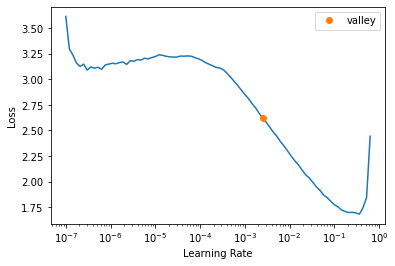

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(40, 1.2e-3)

epoch,train_loss,valid_loss,error_rate,time
0,3.065521,1.962868,0.726190,00:20
1,2.794465,1.558348,0.559524,00:20
2,2.500053,0.999700,0.351190,00:20
3,2.093338,0.748940,0.255952,00:20
4,1.794043,0.615199,0.160714,00:20
5,1.534311,0.541476,0.136905,00:20
6,1.312676,0.490784,0.136905,00:20
7,1.129926,0.448171,0.160714,00:19
8,0.973673,0.448321,0.119048,00:20
9,0.847215,0.423493,0.136905,00:20


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.w

In [ ]:
learn.save('stage-1-effNet-40ep')

Path('models/stage-1-effNet-40ep.pth')

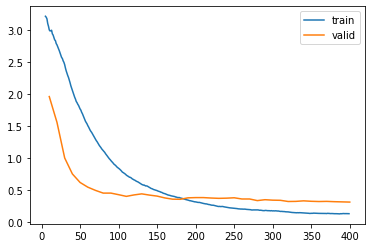

In [ ]:
learn.recorder.plot_loss()

In [ ]:
learn.save('stage-1_effNet-14ep')

Path('models/stage-1_effNet-14ep.pth')

In [ ]:
learn.save('stage-1_effNet-13ep')

Path('models/stage-1_effNet-13ep.pth')

IndexError: ignored

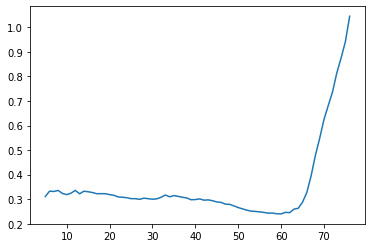

In [ ]:
learn.recorder.plot_loss()

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.w

SuggestedLRs(valley=tensor(0.0010))

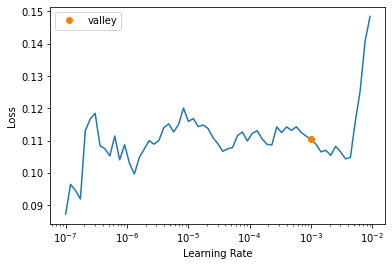

In [ ]:
learn.unfreeze()
learn.lr_find()

In [ ]:
#learn.load('stage-1_effNet-12')

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(2,  lr_max=slice(1e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.114371,0.287928,0.101190,00:21
1,0.102702,0.297817,0.101190,00:21


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [ ]:
learn.save('stage-2-effNet-10ep-11er')

Path('models/stage-2-effNet-10ep-11er.pth')

# Weitere Modell Ausarbeitung

## Detailbetrachtung


In [ ]:
x,y = dls.one_batch()

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Sigmoid-function und softmax: Lesson 04: 1:26

Splitte in Abhängige und Unabhängige Variable:

In [ ]:
dls.vocab

['abramis_brama', 'ameiurus_nebulosus', 'carassius_auratus', 'cobitis_taenia', 'cyprinus_carpio', 'esox_lucius', 'gymnocephalus_cernua', 'salmo_trutta']

In [ ]:
y

TensorCategory([4, 7, 7, 3, 7, 2, 2, 7, 7, 4, 3, 3, 0, 6, 0, 6, 5, 5, 7, 1, 0, 3, 3, 5, 7, 1, 7, 5, 7, 4, 3, 5, 1, 3, 3, 4, 2, 3, 7, 6, 3, 2, 3, 2, 6, 6, 2, 2, 3, 1, 3, 4, 6, 7, 2, 5, 2, 2, 5, 3, 3, 7, 3, 0],
       device='cuda:0')

Zeige die Wahrscheinlichkeiten für jede Art des ersten Bildes an.

In [ ]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([1.6031e-03, 4.6407e-04, 1.7762e-03, 1.6690e-03, 7.6031e-01, 1.1996e-02, 1.6868e-01, 5.3502e-02])

Prüfe der Wahrscheinlichkeiten des ersten Bildes, insgesamt gibt es acht, so viele wie es Klassen gibt, mit einer summe von 1. Es scheint alles gut zu funktionieren.

In [ ]:
len(preds[0]), preds[0].sum()

(8, tensor(1.))

CrossEntropyLoss = zuerst den Softmax nehmen, dann die log-likelihood davon nennt sich cross entropy loss. 
(lesson 04 - 1:26)


# Ausarbeitung des Modells

In diesem Kapitel erfolgt die detaillierte Ausarbeitung des Modells. 

In [ ]:
learn = cnn_learner(dls, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


## Learning Rate

Die Learning Rate kann als Schrittgröße zum trainieren des Modells verstanden werden. Ein hoher Wert kann zu schnelleren Verbesserungen führen, im schlimmsten Fall allerdings auch dazu, dass sich der Verlust immer weiter verschlechtert. Bei einer kleinen Learning Rate werden nur sehr kleine Schritte unternommen, dies kann dazu führen das es außerordentlich lange dauert das Modell zu trainieren. Aus diesem Grund erfolgt eine Erläuterung zum ermitteln einer angemessenen Learning Rate innerhalb dieses Kapitels.  

Veranschauliche die verschlechterung mit relativ hoher Learning Rate: 

In [ ]:
#learn=cnn_learner(dls, resnet34, metrics=error_rate)
#learn.fine_tune(1, base_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,2.005398,5.536870,0.420354,00:26


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


epoch,train_loss,valid_loss,error_rate,time
0,3.292578,748.796387,0.907080,00:27


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Zu hohe learning rate = wird schlechter und schlechter, zu klein, dauert ewig da mini-schritte: Nutze learning rate finder. 
Vorgehen, erste miniBatch bei geringer learning rate und plotte den Loss / Learning rate. Mit dem Loss relativ hoch, aber nicht "maximal" kann ein guter Wert für die learning Rate herausgearbeitet werden. (Lesson 06: 5 min)

In [ ]:
# hide
# debug
learn.fine_tune(2)

Ein Ansatz ist die ermittlung der Leraning Rate durch Plotten des Verlustes gegen den Wert der Learning Rate welche auf eine logarithmierten Skala erhöht wird. Ziel ist es anschließend, den Wert zu ermitteln mit einer möglichst hohen Neigung. Es ist ebenfalls möglich sich eine Empfehlung anzeigen zu lassen.

Basiert auf stochastic gradient descent - look at one miniBatch at a time, find gradient and step our weights based on lr and gradient. Leslie Smith - lets do first miniBatch very low learning rate, and each miniBatch increase lr by 25% irgendwann sind die 25% schritte groß genug das der loss sich reduziert, bis die lr zu hoch wird und sich der loss verschlechtert.  

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.w

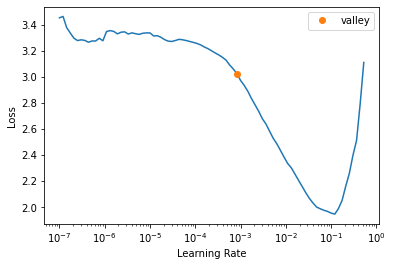

In [ ]:
learn.lr_find()
#learn.recorder.plot(suggestion=True)


Mit dieser Learning Rate starten wir das erste Training. 

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

#learn.fine_tune(12, base_lr=1e-3)

In [ ]:
learn.fit_one_cycle(12, lr_max=1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,2.942103,1.849501,0.671498,00:24
1,2.396307,0.963587,0.289855,00:24
2,1.804646,0.724577,0.198068,00:24
3,1.412626,0.608408,0.193237,00:24
4,1.116780,0.529664,0.169082,00:24
5,0.912391,0.522893,0.140097,00:24
6,0.756011,0.505551,0.125604,00:24
7,0.635072,0.500775,0.125604,00:23
8,0.541038,0.510877,0.115942,00:23
9,0.466295,0.504124,0.125604,00:24


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.w

In [ ]:
# about 11.59% error rate - maybe overfit BUT trainloss > valid-loss until final 3 epochs
learn.save('stage-1-aug-res34-11e')


Path('models/stage-1-aug-res34-11e.pth')

Lasst und zusätzlich ein Modell mit der ResNet50 Architektur ausprobieren. 

In [ ]:
learn_r50 = cnn_learner(dls, resnet50, metrics=error_rate)
learn_r50.fit_one_cycle(12,lr_max=1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,2.922891,1.324876,0.420290,00:24
1,1.936095,0.711014,0.193237,00:25
2,1.371728,0.562458,0.125604,00:25
3,0.995940,0.587090,0.135266,00:25
4,0.749692,0.587900,0.154589,00:25
5,0.585617,0.587363,0.178744,00:25
6,0.463092,0.562813,0.159420,00:25
7,0.374304,0.542109,0.140097,00:25
8,0.306587,0.504342,0.135266,00:25
9,0.253780,0.494363,0.130435,00:25


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.w

In [ ]:
# bestens 13.04% error Rate - 10th epoch (overfitted!)
learn_r50.save('stage-1-aug-res50-11e')


Path('models/stage-1-aug-res50-11e.pth')

Zeige die Verluste als plot: 

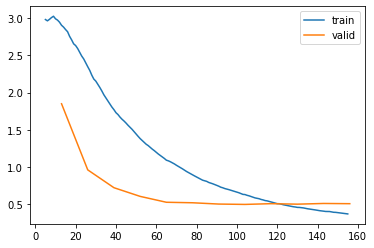

In [ ]:
learn.recorder.plot_loss()

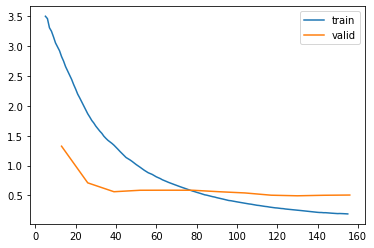

In [ ]:

learn_r50.recorder.plot_loss()

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.w

SuggestedLRs(valley=tensor(0.0044))

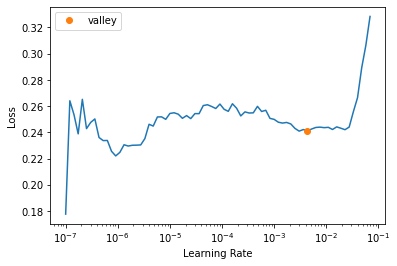

In [ ]:
# Prüfe Learning Rate
learn.lr_find() 

Die Kurve zeigt ein anderes Bild, die Entscheidung für eine Learning Rate ist hier etwas schwieriger. Vom ermittelten Tal wird empfohlen ca. ein Exponent abzuziehen. In diesem Fall liegt das Tal wohl bei 7e-3, das Modell könnte im Stage-2 folglich mit LR=7e-4 trainiert werden. 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.w

SuggestedLRs(valley=tensor(0.0017))

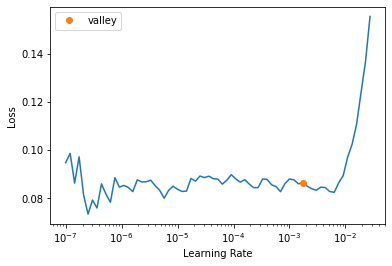

In [ ]:
learn_r50.lr_find() 

In [ ]:
learn_r50.unfreeze() 

In [ ]:
learn_r50.fit_one_cycle(6, lr_max=2e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.118811,0.462440,0.115942,00:26
1,0.140639,0.715554,0.188406,00:26
2,0.181821,0.736311,0.154589,00:26
3,0.174512,0.621198,0.135266,00:26
4,0.148575,0.512945,0.135266,00:26
5,0.122809,0.489212,0.115942,00:27


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.w

In [ ]:
learn_r50.save('stage-2-aug-res50-6e')

Path('models/stage-2-aug-res50-6e.pth')

Die learning rate für das ResNet50 Modell liegt bei 2e-3, folglich erfolgt Stage-2 training mit 2e-4.

## Discrinative learning rate:

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(9, 1e-3)
learn.unfreeze() 
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,3.281256,1.971331,0.647343,00:23
1,2.477323,0.947148,0.275362,00:23
2,1.826862,0.727502,0.193237,00:23
3,1.404914,0.682936,0.183575,00:23
4,1.126268,0.647881,0.178744,00:24
5,0.936870,0.615448,0.164251,00:24
6,0.796857,0.609406,0.173913,00:24
7,0.692699,0.603408,0.164251,00:23
8,0.599401,0.605755,0.169082,00:23


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.w

epoch,train_loss,valid_loss,error_rate,time
0,0.419345,0.603657,0.173913,00:24
1,0.382043,0.597611,0.164251,00:24
2,0.358961,0.583080,0.164251,00:24
3,0.340511,0.576284,0.164251,00:25
4,0.317805,0.555485,0.164251,00:25
5,0.305632,0.542339,0.149758,00:25
6,0.296401,0.543169,0.135266,00:24
7,0.278363,0.542178,0.144928,00:25
8,0.257627,0.538782,0.144928,00:25
9,0.243753,0.532467,0.144928,00:25


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.w

In [ ]:
learn.unfreeze() 
learn.fit_one_cycle(8, lr_max=1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.156681,0.711519,0.231884,00:25
1,0.814217,1.685124,0.275362,00:24
2,0.872370,5.819108,0.574879,00:25


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


KeyboardInterrupt: ignored

Die stärkste Neigung wäre in diesem Fall um 4e-3, die Empfehlung liegt genau auf 1e-3. 

In [ ]:
#print(f"minimum/10: {learn:.2e}, steepes point: {lr_steep:.2e}")

TypeError: ignored

Es ergibt zudem Sinn ein bereits vor trainiertes Modell zu verbessern indem mit einer einer kleinen LR für die ersten layer und größere LR für die letzten Layer. Zu begründen ist dies mit den vorderen Layern die konturen etc. berücksichtigen und nur wenig Anpassung für dieses Modell benötigen wobei die letzten Layer sich sehr spezifisch mit dem Ursprung des ersten Modells auseinandersetzen und demnach mehr Veränderungen erfordern. Dieses Vorgehen ist von FastAI implementiert worden und nennt sich Discriminative learning rates. 

**JASON YOSINSKI 2014 Shows thatwhen transfer learning different layers of a nn should train at different speeds, as seen in.**

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.w

ValueError: ignored

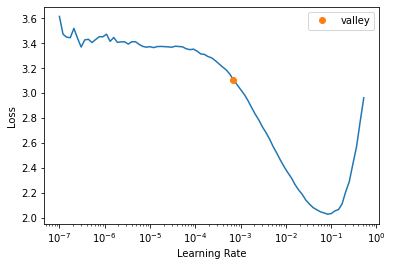

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)


In [ ]:
print(f"minimum/10: {lr_min:.2e}, steepes point: {lr_steep:.e2}")

NameError: ignored

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4, base_lr=1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,2.870643,1.232798,0.381643,01:31


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


epoch,train_loss,valid_loss,error_rate,time
0,1.558659,0.960065,0.294686,00:34
1,1.225574,0.692655,0.198068,00:34
2,0.936001,0.654168,0.173913,00:35
3,0.767531,0.635443,0.183575,00:34


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


###############################

Let's look at each of these arguments in turn. First we provide a tuple where we specify what types we want for the independent and dependent variables: 

```python
blocks=(ImageBlock, CategoryBlock)
```

The *independent variable* is the thing we are using to make predictions from, and the *dependent variable* is our target. In this case, our independent variables are images, and our dependent variables are the categories (type of bear) for each image. We will see many other types of block in the rest of this book.

For this `DataLoaders` our underlying items will be file paths. We have to tell fastai how to get a list of those files. The `get_image_files` function takes a path, and returns a list of all of the images in that path (recursively, by default):

```python
get_items=get_image_files
```

Often, datasets that you download will already have a validation set defined. Sometimes this is done by placing the images for the training and validation sets into different folders. Sometimes it is done by providing a CSV file in which each filename is listed along with which dataset it should be in. There are many ways that this can be done, and fastai provides a very general approach that allows you to use one of its predefined classes for this, or to write your own. In this case, however, we simply want to split our training and validation sets randomly. However, we would like to have the same training/validation split each time we run this notebook, so we fix the random seed (computers don't really know how to create random numbers at all, but simply create lists of numbers that look random; if you provide the same starting point for that list each time—called the *seed*—then you will get the exact same list each time):


```python
splitter=RandomSplitter(valid_pct=0.2, seed=42)
```

The independent variable is often referred to as `x` and the dependent variable is often referred to as `y`. Here, we are telling fastai what function to call to create the labels in our dataset:

```python
get_y=parent_label
```

`parent_label` is a function provided by fastai that simply gets the name of the folder a file is in. Because we put each of our bear images into folders based on the type of bear, this is going to give us the labels that we need.

Our images are all different sizes, and this is a problem for deep learning: we don't feed the model one image at a time but several of them (what we call a *mini-batch*). To group them in a big array (usually called a *tensor*) that is going to go through our model, they all need to be of the same size. So, we need to add a transform which will resize these images to the same size. *Item transforms* are pieces of code that run on each individual item, whether it be an image, category, or so forth. fastai includes many predefined transforms; we use the `Resize` transform here:

```python
item_tfms=Resize(128)
```

This command has given us a `DataBlock` object. This is like a *template* for creating a `DataLoaders`. We still need to tell fastai the actual source of our data—in this case, the path where the images can be found:

In [ ]:
dls = fish.dataloaders(path)

A `DataLoaders` includes validation and training `DataLoader`s. `DataLoader` is a class that provides batches of a few items at a time to the GPU. We'll be learning a lot more about this class in the next chapter. When you loop through a `DataLoader` fastai will give you 64 (by default) items at a time, all stacked up into a single tensor. We can take a look at a few of those items by calling the `show_batch` method on a `DataLoader`:

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


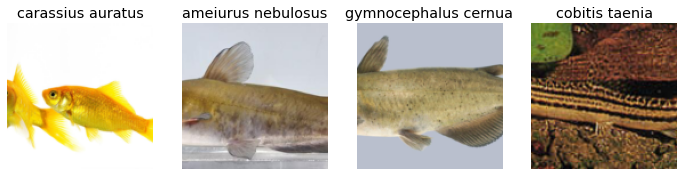

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

By default `Resize` *crops* the images to fit a square shape of the size requested, using the full width or height. This can result in losing some important details. Alternatively, you can ask fastai to pad the images with zeros (black), or squish/stretch them:

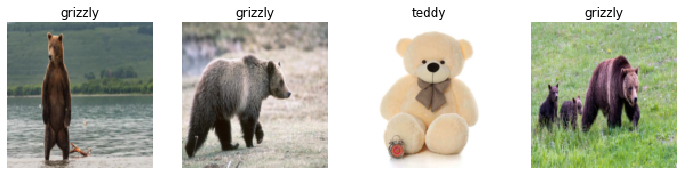

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

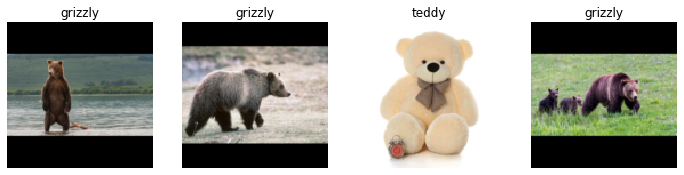

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

All of these approaches seem somewhat wasteful, or problematic. If we squish or stretch the images they end up as unrealistic shapes, leading to a model that learns that things look different to how they actually are, which we would expect to result in lower accuracy. If we crop the images then we remove some of the features that allow us to perform recognition. For instance, if we were trying to recognize breeds of dog or cat, we might end up cropping out a key part of the body or the face necessary to distinguish between similar breeds. If we pad the images then we have a whole lot of empty space, which is just wasted computation for our model and results in a lower effective resolution for the part of the image we actually use.

Instead, what we normally do in practice is to randomly select part of the image, and crop to just that part. On each epoch (which is one complete pass through all of our images in the dataset) we randomly select a different part of each image. This means that our model can learn to focus on, and recognize, different features in our images. It also reflects how images work in the real world: different photos of the same thing may be framed in slightly different ways.

In fact, an entirely untrained neural network knows nothing whatsoever about how images behave. It doesn't even recognize that when an object is rotated by one degree, it still is a picture of the same thing! So actually training the neural network with examples of images where the objects are in slightly different places and slightly different sizes helps it to understand the basic concept of what an object is, and how it can be represented in an image.

Here's another example where we replace `Resize` with `RandomResizedCrop`, which is the transform that provides the behavior we just described. The most important parameter to pass in is `min_scale`, which determines how much of the image to select at minimum each time:

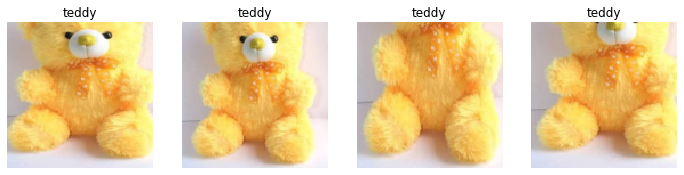

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

We used `unique=True` to have the same image repeated with different versions of this `RandomResizedCrop` transform. This is a specific example of a more general technique, called data augmentation.

## Training Your Model, and Using It to Clean Your Data

Time to use the same lines of code as in <<chapter_intro>> to train our bear classifier.

We don't have a lot of data for our problem (150 pictures of each sort of bear at most), so to train our model, we'll use `RandomResizedCrop` with an image size of 224 px, which is fairly standard for image classification, and default `aug_transforms`:

In [ ]:
fish = fish.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())


In [ ]:
dls = fish.dataloaders(path)

We can now create our `Learner` and fine-tune it in the usual way:

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,2.448101,1.152334,0.331858,02:29


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


epoch,train_loss,valid_loss,error_rate,time
0,1.200703,0.867131,0.247788,03:09
1,0.912690,0.753951,0.207965,03:08
2,0.716968,0.728923,0.185841,03:08
3,0.593448,0.680677,0.172566,03:08


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Now let's see whether the mistakes the model is making are mainly thinking that grizzlies are teddies (that would be bad for safety!), or that grizzlies are black bears, or something else. To visualize this, we can create a *confusion matrix*:

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


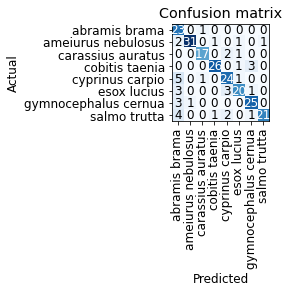

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

The rows represent all the black, grizzly, and teddy bears in our dataset, respectively. The columns represent the images which the model predicted as black, grizzly, and teddy bears, respectively. Therefore, the diagonal of the matrix shows the images which were classified correctly, and the off-diagonal cells represent those which were classified incorrectly. This is one of the many ways that fastai allows you to view the results of your model. It is (of course!) calculated using the validation set. With the color-coding, the goal is to have white everywhere except the diagonal, where we want dark blue. Our bear classifier isn't making many mistakes!

It's helpful to see where exactly our errors are occurring, to see whether they're due to a dataset problem (e.g., images that aren't bears at all, or are labeled incorrectly, etc.), or a model problem (perhaps it isn't handling images taken with unusual lighting, or from a different angle, etc.). To do this, we can sort our images by their *loss*.

The loss is a number that is higher if the model is incorrect (especially if it's also confident of its incorrect answer), or if it's correct, but not confident of its correct answer. In a couple of chapters we'll learn in depth how loss is calculated and used in the training process. For now, `plot_top_losses` shows us the images with the highest loss in our dataset. As the title of the output says, each image is labeled with four things: prediction, actual (target label), loss, and probability. The *probability* here is the confidence level, from zero to one, that the model has assigned to its prediction:

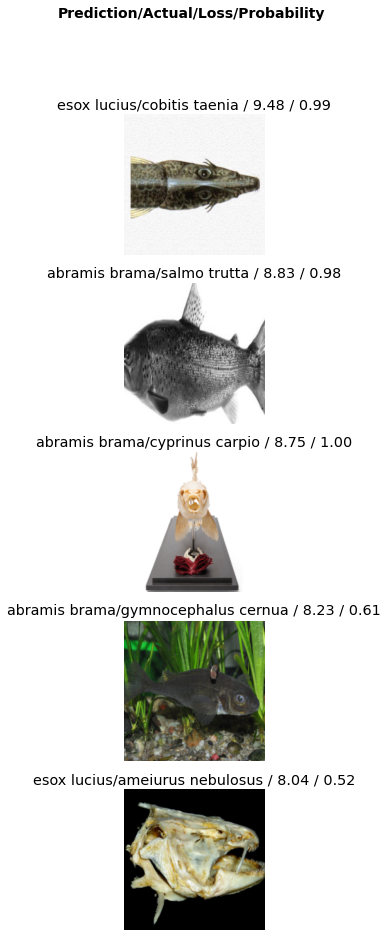

In [ ]:
interp.plot_top_losses(5, nrows=5)

This output shows that the image with the highest loss is one that has been predicted as "grizzly" with high confidence. However, it's labeled (based on our Bing image search) as "black." We're not bear experts, but it sure looks to us like this label is incorrect! We should probably change its label to "grizzly."

The intuitive approach to doing data cleaning is to do it *before* you train a model. But as you've seen in this case, a model can actually help you find data issues more quickly and easily. So, we normally prefer to train a quick and simple model first, and then use it to help us with data cleaning.

fastai includes a handy GUI for data cleaning called `ImageClassifierCleaner` that allows you to choose a category and the training versus validation set and view the highest-loss images (in order), along with menus to allow images to be selected for removal or relabeling:

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

<img alt="Cleaner widget" width="700" src="https://github.com/Capou/FishClassifier/blob/master/images/att_00007.png?raw=1">

In [ ]:
#hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

We can see that amongst our "black bears" is an image that contains two bears: one grizzly, one black. So, we should choose `<Delete>` in the menu under this image. `ImageClassifierCleaner` doesn't actually do the deleting or changing of labels for you; it just returns the indices of items to change. So, for instance, to delete (`unlink`) all images selected for deletion, we would run:

```python
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
```

To move images for which we've selected a different category, we would run:

```python
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)
```

> s: Cleaning the data and getting it ready for your model are two of the biggest challenges for data scientists; they say it takes 90% of their time. The fastai library aims to provide tools that make it as easy as possible.

We'll be seeing more examples of model-driven data cleaning throughout this book. Once we've cleaned up our data, we can retrain our model. Try it yourself, and see if your accuracy improves!

> note: No Need for Big Data: After cleaning the dataset using these steps, we generally are seeing 100% accuracy on this task. We even see that result when we download a lot fewer images than the 150 per class we're using here. As you can see, the common complaint that _you need massive amounts of data to do deep learning_ can be a very long way from the truth!

Now that we have trained our model, let's see how we can deploy it to be used in practice.

# Segmentation


## Object Detection with fast.ai

__Cretdits__

- Fast.AI https://github.com/fastai/course-v3/blob/master/nbs/dl2/pascal.ipynb

In [ ]:
#!pip install fastai.vision

ERROR: Could not find a version that satisfies the requirement fastai.vision (from versions: none)
ERROR: No matching distribution found for fastai.vision


In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate
from IPython.display import Image
from pathlib import Path

from fastai.vision import * 

In [ ]:
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resent18, pretrained=False, loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1,0.1)

<function fastai.vision.image.open_image>

We are going to use the [Pascal dataset](http://host.robots.ox.ac.uk/pascal/VOC/) for object detection. There is a version from 2007 and a bigger version from 2012. We'll use the 2007 version here. 

In [ ]:
path = untar_data(URLs.PASCAL_2007)

AssertionError: ignored

The annotations for the images are stored in json files that give the bounding boxes for each class.

In [ ]:
import json
annots = json.load(open(path/'train.json'))

NameError: ignored

In [ ]:
annots.keys()

dict_keys(['images', 'type', 'annotations', 'categories'])

In [ ]:
annots['annotations'][0]

{'area': 34104,
 'bbox': [155, 96, 196, 174],
 'category_id': 7,
 'id': 1,
 'ignore': 0,
 'image_id': 12,
 'iscrowd': 0,
 'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]]}

This first annotation is a bounding box on the image with id 12, and the corresponding object is the category with id 7. We can read the correspondance in the 'images' and the 'categories' keys.

In [ ]:
annots['categories']

[{'id': 1, 'name': 'aeroplane', 'supercategory': 'none'},
 {'id': 2, 'name': 'bicycle', 'supercategory': 'none'},
 {'id': 3, 'name': 'bird', 'supercategory': 'none'},
 {'id': 4, 'name': 'boat', 'supercategory': 'none'},
 {'id': 5, 'name': 'bottle', 'supercategory': 'none'},
 {'id': 6, 'name': 'bus', 'supercategory': 'none'},
 {'id': 7, 'name': 'car', 'supercategory': 'none'},
 {'id': 8, 'name': 'cat', 'supercategory': 'none'},
 {'id': 9, 'name': 'chair', 'supercategory': 'none'},
 {'id': 10, 'name': 'cow', 'supercategory': 'none'},
 {'id': 11, 'name': 'diningtable', 'supercategory': 'none'},
 {'id': 12, 'name': 'dog', 'supercategory': 'none'},
 {'id': 13, 'name': 'horse', 'supercategory': 'none'},
 {'id': 14, 'name': 'motorbike', 'supercategory': 'none'},
 {'id': 15, 'name': 'person', 'supercategory': 'none'},
 {'id': 16, 'name': 'pottedplant', 'supercategory': 'none'},
 {'id': 17, 'name': 'sheep', 'supercategory': 'none'},
 {'id': 18, 'name': 'sofa', 'supercategory': 'none'},
 {'id': 

There is a convenience method in fastai to extract all the annotations and map them with the right images/categories directly, as long as they are in the format we just saw (called the COCO format). 

In [ ]:
train_images, train_lbl_bbox = get_annotations(path/'train.json')
val_images, val_lbl_bbox = get_annotations(path/'valid.json')

In [ ]:
train_lbl_bbox[0]

([[155, 96, 351, 270]], ['car'])

Here we will directly find the same image as before at the beginning of the training set, with the corresponding bounding box and category.

In [ ]:
train_images[0], train_lbl_bbox[0]

('000012.jpg', ([[155, 96, 351, 270]], ['car']))

To see it, we open the image properly and we create an `ImageBBox` object from the list of bounding boxes. This will allow us to apply data augmentation to our bounding box. To create an `ImageBBox`, we need to give it the height and the width of the original picture, the list of bounding boxes, the list of category ids and the classes list (to map an id to a class).

Here we don't have a class dictionary available (that will be done automatically behind the scenes with the data block API), so we just pass id 0 and `classes=['car']`.

In [ ]:
img = open_image(path/'train'/train_images[0])
bbox = ImageBBox.create(*img.size, train_lbl_bbox[0][0], [0], classes=['car'])
img.show(figsize=(6,4), y=bbox)

NameError: ignored

This works with one or several bounding boxes:

In [ ]:
train_images[1], train_lbl_bbox[1]

('000017.jpg',
 ([[184, 61, 279, 199], [89, 77, 403, 336]], ['person', 'horse']))

In [ ]:
img = open_image(path/'train'/train_images[1])
bbox = ImageBBox.create(*img.size, train_lbl_bbox[1][0], [0, 1], classes=['person', 'horse'])
img.show(figsize=(6,4), y=bbox)

NameError: ignored

And if we apply a transform to our image and the `ImageBBox` object, they stay aligned:

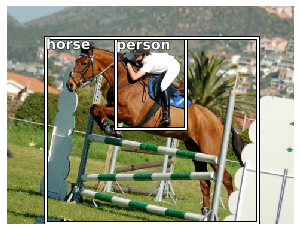

In [ ]:
img = img.rotate(-10)
bbox = bbox.rotate(-10)
img.show(figsize=(6,4), y=bbox)

We group all the image filenames and annotations together, to use the data block API to load the dataset in a `DataBunch`.

In [ ]:
images, lbl_bbox = train_images+val_images,train_lbl_bbox+val_lbl_bbox
img2bbox = dict(zip(images, lbl_bbox))
get_y_func = lambda o:img2bbox[o.name]

In [ ]:
img2bbox['000012.jpg']

[[[96, 155, 270, 351]], ['car']]

In [ ]:
def get_data(bs, size):
    src = (ObjectItemList.from_folder(path/'train')
           .split_by_files(val_images)
           .label_from_func(get_y_func)
           .transform(get_transforms(), size=size, tfm_y=True))
    return src.databunch(path=path, bs=bs, collate_fn=bb_pad_collate).normalize(imagenet_stats)

In [ ]:
data = get_data(64,128)

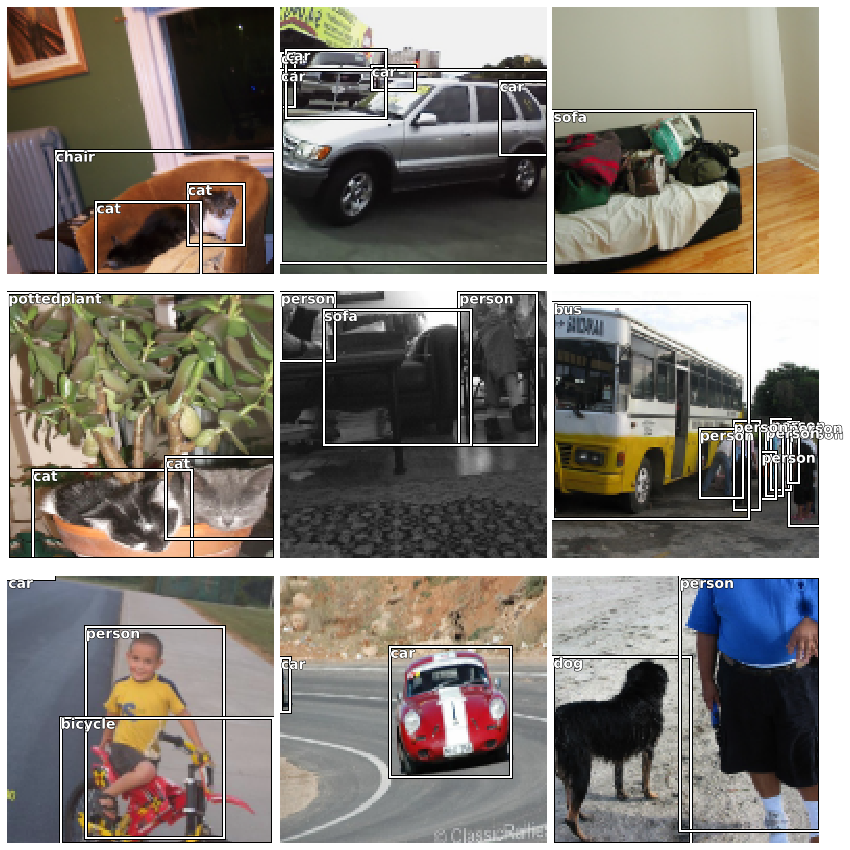

In [ ]:
data.show_batch(rows=3)